# Linear regression

The linear regression is a training procedure based on a linear model. The model makes a prediction by simply computing a weighted sum of the input features, plus a constant term called the bias term (also called the intercept term, $\theta_0$):

$$ \hat{y}=\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$


This can be written more easy by the using vector notation form:

$$\hat{y}= h_\theta(x) = \theta^T x$$

---
**Now that we have our model, how do we train it?**

*Please, consider that training the model means adjusting the parameters to reduce the error or minimizing the cost function.* 

The most common performance measure of a regression model is the **Mean Square Error (MSE)**. Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the MSE:


$$ MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^T x^{(i)}-y^{(i)} \right)^2$$


$$ MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\hat{y}^{(i)}-y^{(i)} \right)^2$$

$$ MSE(X,h_\theta) = \frac{1}{m}  \left(\hat{y}-y \right)^2$$

# The normal equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form or direct solution that gives the result. This is called the **Normal Equation**; and can be found it by deriving the *MSE* equation as a function of $\theta$ and making it equals to zero:

\begin{eqnarray*}
	\frac{\partial J(\theta)}{\partial \theta} = 0\\
	\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m}\left(\theta x-y \right)^2=\frac{1}{m}\left(\theta x-y \right)^T\left(\theta x-y \right)\\
	\frac{1}{m}\left[(\theta x)^T-y^T \right] \left[\theta x-y \right]
\end{eqnarray*}

just considers that:
\begin{align*}
	(A^T)^T = A\\
	(A+B)^T = A^T + B^T\\
	(kA)^T = kA^T\\
	(AB)^T =A^TB^T
\end{align*}

just considers that $(\theta x)^Ty=y^T(\theta x)$
\begin{align*}
	0=\frac{\partial\,}{\partial \theta}\frac{1}{m}\left[(\theta x)^T\theta x - (\theta x)^Ty-y^T\theta x+y^Ty \right]\\
\end{align*}

$$0=\frac{\partial\,}{\partial \theta}\frac{1}{m}\left[(\theta x)^T\theta x - 2(\theta x)^Ty+y^Ty \right]$$

$$0=\frac{1}{m}\left[2\theta x^T x - 2(x)^Ty+0 \right]$$

$$0=\frac{2}{m}\left[\theta x^T x - (x)^Ty+0 \right]$$

$$\hat{\theta} = (X^T X)^{-1} X^{T} y $$

## A basic example

First try to implement the linear regressor by only using two instances or points, $(x^0, y^0)$ and $(x^1,y^1)$, thus:

$$\hat{y}^{(i)}=\theta_0 x_0+ \theta_1 x_1^{(i)}$$

but, considers that $x_0=1$, then:

$$\hat{y}^{(i)}=\theta_0 + \theta_1 x_1^{(i)}$$

then, to write it in vector form

$$
    \hat{y}^0=
    \begin{bmatrix}
    \theta_0 & \theta_1
    \end{bmatrix} 
    \begin{bmatrix}
    1 \\ 
    x_0
    \end{bmatrix}
$$

Now, we need a matrix form to manage all data:

$$
    \begin{bmatrix}
    \hat{y}^0 \\ 
    \hat{y}^1\\
    \end{bmatrix}
    =
    \begin{bmatrix}
    \theta_0 + \theta_1 x^0_1 \\
    \theta_0 + \theta_1 x^0_1 \\
    \end{bmatrix}
$$

$$
    \begin{bmatrix}
    \hat{y}^0 \\ 
    \hat{y}^1\\
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 &  x^0_1 \\
    1 &  x^1_1 \\
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \end{bmatrix}
$$

Now, let's compute $\theta$ using the normal equation:

In [2]:
import numpy as np
X0 = np.array([[0.001],
               [2.196]])
X = np.c_[np.ones(2),X0]
y = np.array([4.314825, 10.877373])
X

array([[1.000e+00, 1.000e-03],
       [1.000e+00, 2.196e+00]])

In [3]:
theta =  np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([4.31183523, 2.9897713 ])

In [4]:
t0 = theta[0]
t1 = theta[1]

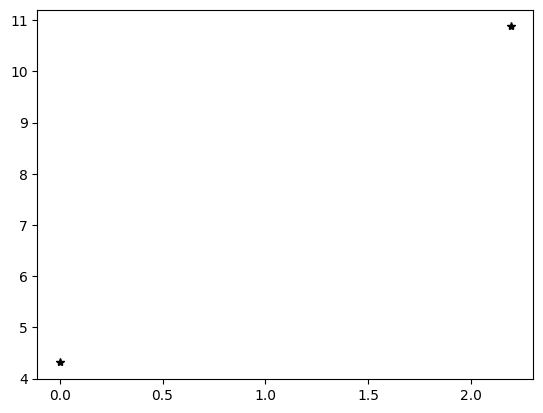

In [5]:
import matplotlib.pyplot as plt
plt.plot(X0,y, '*k')
plt.show()

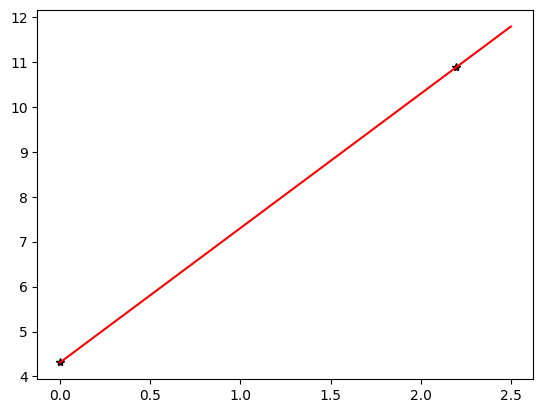

In [8]:
Xvec = np.linspace(0,2.5,2)
Xnew = np.c_[np.ones((2, 1)), Xvec]
ypre = Xnew.dot(theta)
plt.plot(X0,y, '*k')
plt.plot(Xvec, ypre, '-r')
plt.show()

# My Linear Regressor

**Instructions:** Create your own function train (estimate) the model's parameter for a Linear Regressor implementing the *Normal Equation*. Test your model with the next generated data.

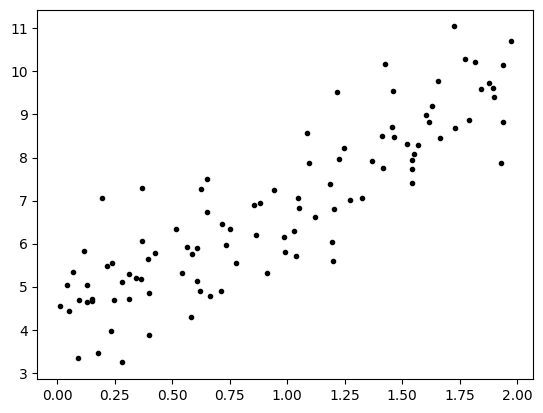

In [9]:
np.random.seed(42)
X0 = 2 * np.random.rand(100, 1)
X = np.c_[np.ones((100, 1)), X0]  # add x0 = 1 to each instance
y = 4 + 3 * X0 + np.random.randn(100, 1)
plt.plot(X0, y, '.k')

Therefore, the model will become:

$$
    \begin{bmatrix}
    \hat{y}^0 \\ 
    \hat{y}^1\\
    \vdots \\
    \hat{y}^n
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 &  x^0_1 \\
    1 &  x^1_1 \\
    \vdots & \vdots \\
    1 & x^n_1
    \end{bmatrix}
    \begin{bmatrix}
    \theta_0 \\
    \theta_1 \\
    \vdots \\
    \theta_n
    \end{bmatrix}
$$


## Using Sklearn to train the model
Python already includes a linear regression function within Scikit-Learn.

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[0.        , 2.77011339]]))

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #Se agrega x0=1 para cada instancia
y_Pred=lin_reg.predict(X_new_b)
y_Pred

array([[4.21509616],
       [9.75532293]])

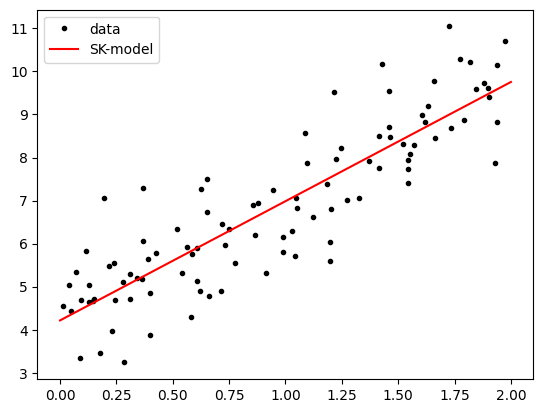

In [13]:
plt.plot(X0,y, '.k', label='data')
plt.plot(X_new, y_Pred, '-r', label='SK-model')
plt.legend()

# Batch Gradient Descent Example for Linear Model

$\nabla MSE(\theta)=\frac{2}{m} X^T(X\theta-y)$ 

$\theta_N=\theta-\eta \nabla MSE(\theta)$

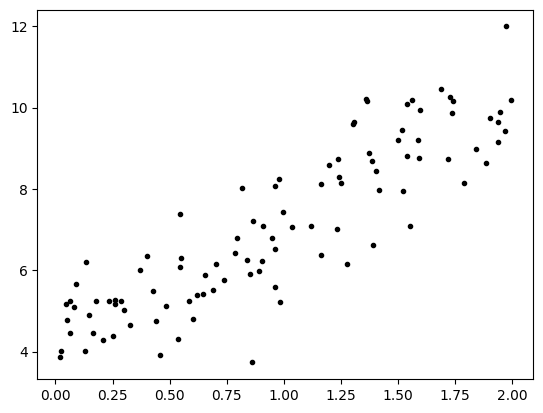

In [19]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
Xb = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, '.k')
plt.show()

In [29]:
eta = 0.01  # learning rate
ni = 20 # iterations
m = 100 # dataset size
theta = np.random.randn(2,1)  # random initialization
theta

array([[-0.52563093],
       [ 0.03240701]])

In [24]:
for iteration in range(ni):
    gradients = 2/m * Xb.T.dot(Xb.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.24631965],
       [2.93425959]])

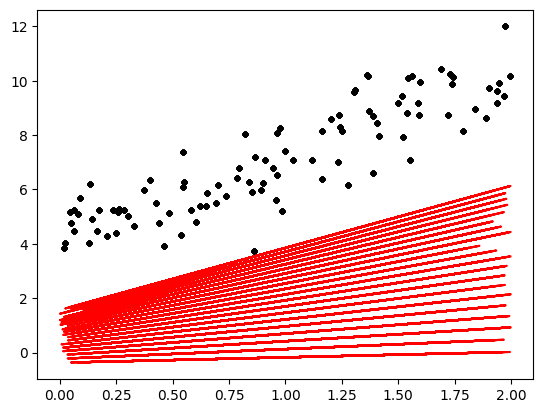

In [30]:
for iteration in range(ni):
    gradients = 2/m * Xb.T.dot(Xb.dot(theta) - y)
    theta = theta - eta * gradients
    Xnew = 2 * np.random.rand(100, 1)
    plt.plot(X,y,'.k')
    Xbw = np.c_[np.ones((100, 1)), Xnew]  # add x0 = 1 to each instance
    ypre = Xbw.dot(theta)
    plt.plot(Xnew, ypre, '-r')